# Representations of Networks

Now that we know how to represent networks with matrices, let's take a step back and take a look at what network representation is in general, and the different ways you might think about representing networks to understand different aspects of the network.

We already know that the topological structure of networks is just a collection of nodes, with pairs of nodes potentially linked together by edges. Mathematically, this means that a network is defined by two objects: the set of nodes, and the set of edges, with each edge just being defined as a pair of nodes for undirected networks. Networks can have additional structure: you might have extra information about each node ("features" or "covariates"), which we'll talk about in the joint representation section in chapter 6. Edges might also have weights, which are usually measure the connection strength in some way. We learned in the previous section that network topology can be represented with matrices in a number of ways -- with adjacency matrices, Laplacians, or (less commonly) with incidence matrices. 

One major challenge in working with networks is that a lot of standard mathematical operations and metrics remain undefined. What does it mean to add a network to another network, for instance? How would network multiplication work? How do you define a distance between one node and another node? Without these kinds of basic operations and metrics, we are left in the dark when we try to find analogies to non-network data analysis.

Another major challenge is that the number of possible networks can get obscene fairly quickly. See the figure below, for instance. When you allow for only 50 nodes, there are already more than $10^{350}$ possible networks. Just for reference, if you took all hundred-thousand quadrillion vigintillion atoms in the universe, and then made a new entire universe for each of those atoms... you'd still be nowhere near $10^{350}$ atoms. 

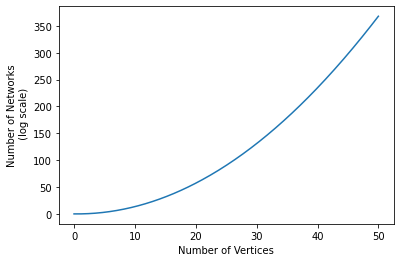

In [61]:
import matplotlib.pyplot as plt
from scipy.special import comb
from contextlib import suppress
from scipy.interpolate import interp1d

# get number of graphs for a given n in log scale
vertices = np.arange(51, step=10)

with suppress(OverflowError):
    n_graphs = np.log10(2**comb(vertices, 2))
n_graphs[-1] = 368

xnew = np.linspace(vertices.min(), vertices.max(), 300)
interpolated = interp1d(vertices, n_graphs, kind="cubic")
ynew = interpolated(xnew)

# plotting code
fig, ax = plt.subplots()
ax.plot(xnew, ynew)
ax.set_xlabel("Number of Nodes")
ax.set_ylabel("Number of Networks\n (log scale)");

To address these challenges, we can generally group analysis into four approaches, each of which addresses these challenges in some way: the bag of features, the bag of edges, the bag of nodes, and the bag of networks, each so-called because you're essentially throwing data into a bag and treating each thing in it as its own object. Let's get into some details!

## Bag of Features
The first approach is called the bag of features. You take networks and you compute statistics from them, either for each node or for the entire network. These statistics could be simple things like the edge count or average path length between two nodes, or more complicated metrics like the clustering coefficient, which indicates how much nodes tend to cluster together. Unfortunately, network statistics like this tend to not be independent from each other; the value of one network statistic will almost always influence the other. This means that it can be difficult to interpret analysis that works by comparing network statistics. It's also hard to figure out which statistics to compute, since there are an infinite number of them. We'll get into the bag of features a bit in this chapter, but it won't pop up too much.

## Bag of Edges

The second approach is called the bag of edges. Here, you just take all of the edges in your network and treat them all as independent entities, and you study them all individually, ignoring interactions between edges. This can work in some situations, but you still run into dependence: if two people within a friend group are friends, that can change the dynamic of the friend group and so change the chance that two other people are friends.

## Bag of Nodes

Similarly to the bag of edges, you can treat all of the nodes as their own entity and do analysis on a bag of nodes. Much of this book will focus on the bag of nodes approach, because you'll often use edge count, covariate information, and other things when you work with bags of nodes -- and, although there's still dependence between nodes, it generally isn't as big of an issue. Most of the single-network methods we'll use in this book will take the bag of nodes approach. What you'll see repeatedly is that we take the nodes of a network and *embed* them so each node is associated with a point on a plot (this is called the Euclidean representation of the node). Then, you can use other methods from mainstream machine learning to learn about your network. We'll get into this heavily in future chapters.

We'll also often associate node representation with community investigation. The idea is that sometimes you have groups of nodes which behave similarly -- maybe they have a higher chance of being connected to each other, or maybe they're all connected to certain other groups of nodes. Regardless of how you define communities, a community investigation motif will pop up: you get your node representation, then you associate nearby nodes to the same community. We can then look at the properties of the node belonging to a particular community, or look at relationships between communities of nodes.

## Bag of Networks

The last approach is the bag of networks, which you'd use when you have more than one network that you're working with. Here, you'd study the networks as a whole and you'd want to test for differences across different networks or classify entire networks into one category or another. You might want to figure out if two networks were drawn from the same probability distribution, or whether you can find a smaller group of nodes that could represent the whole network. The end of this book will cover the bag of networks approach.